<a href="https://colab.research.google.com/github/xbracaa/UAS-KecerdasanBuatan/blob/main/notebook_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Kanker Paru Menggunakan Algoritma Random Forest

Karina Ismaya 2306056

Kailla Salsabila 2306064

Teknik Informatika B


## 1. Data Gathering


### Import library yang diperlukan


In [ ]:
# Library untuk memproses dan visualisasi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import roc_curve, auc

### Data Gathering: Memuat dataset yang diambil dari kaggle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/survey lung cancer.csv")
print("Dataset berhasil dimuat. Dimensi dataset:", data.shape)
print(data.head())

Dataset berhasil dimuat. Dimensi dataset: (309, 16)
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0    MALE   69        0               1        1              0   
1    MALE   74        1               0        0              0   
2  FEMALE   59        0               0        0              1   
3    MALE   63        1               1        1              0   
4  FEMALE   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         1                  1         1   
1                1         1         1         0                  0         0   
2                0         1         0         1                  0         1   
3                0         0         0         0                  1         0   
4                0         0         0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN 

In [ ]:
data


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,FEMALE,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,MALE,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,MALE,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,MALE,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


## 2. Data Preprocessing


### Data Understanding


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
print(data.describe())

              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    0.563107        0.569579    0.498382       0.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    0.000000        0.000000    0.000000       0.000000   
25%     57.000000    0.000000        0.000000    0.000000       0.000000   
50%     62.000000    1.000000        1.000000    0.000000       1.000000   
75%     69.000000    1.000000        1.000000    1.000000       1.000000   
max     87.000000    1.000000        1.000000    1.000000       1.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          0.504854    0.673139    0.556634    0.556634           0.556634   
std           0.500787    0.469827    0.497588    0.497588           0.4

In [ ]:
print("Unique value of gender: ", data["GENDER"].unique())
print("Unique value of Cancer status: ", data["LUNG_CANCER"].unique())

Unique value of gender:  ['MALE' 'FEMALE']
Unique value of Cancer status:  ['YES' 'NO']


In [ ]:
print(data["GENDER"].value_counts())

GENDER
MALE      162
FEMALE    147
Name: count, dtype: int64


In [ ]:
print(data["LUNG_CANCER"].value_counts())

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64


In [ ]:
print(data.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


### Exploratory Data Analysis (EDA)


#### Plot histogram untuk kolom numerik


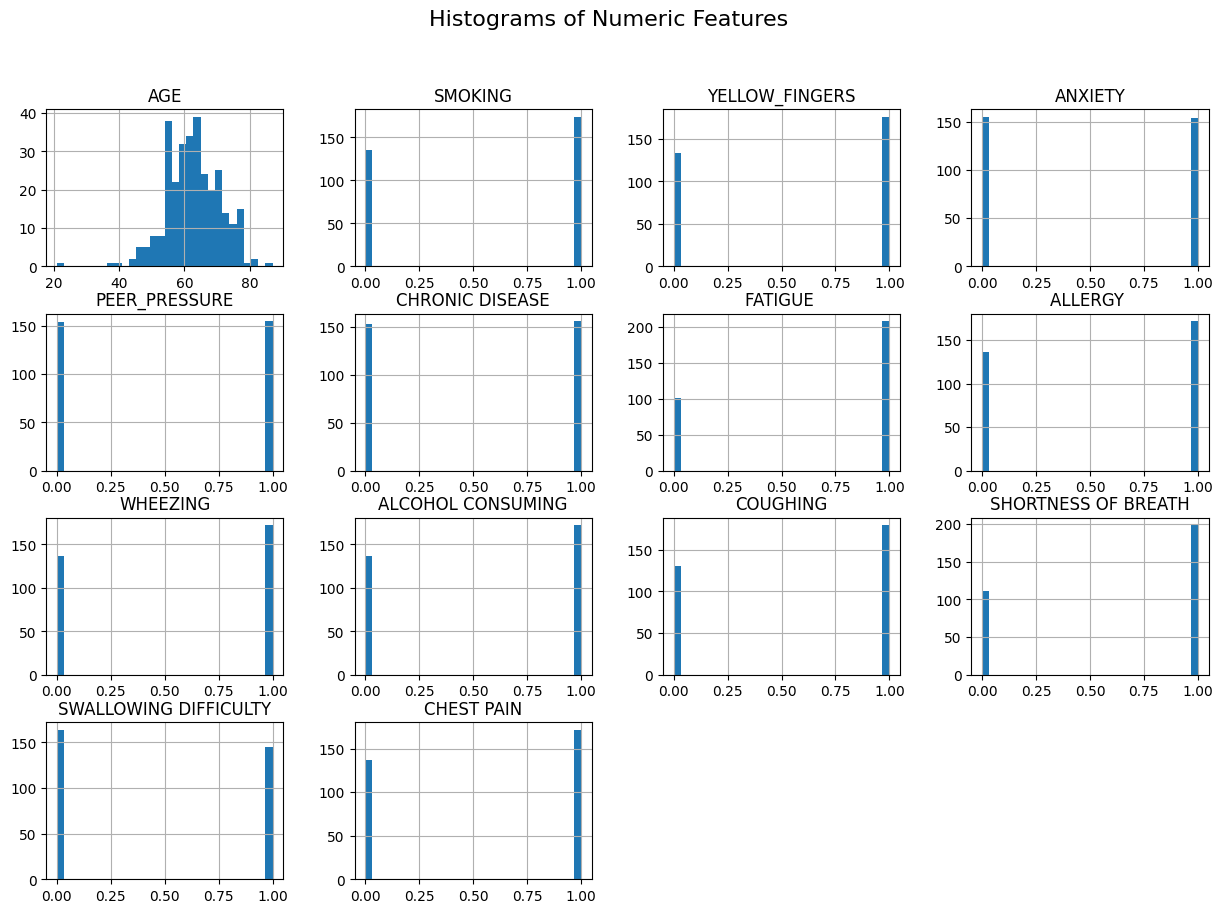

In [ ]:
numeric_cols = ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN' ]
data[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

#### Plot density untuk melihat distribusi data


/tmp/ipython-input-14-2375116849.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


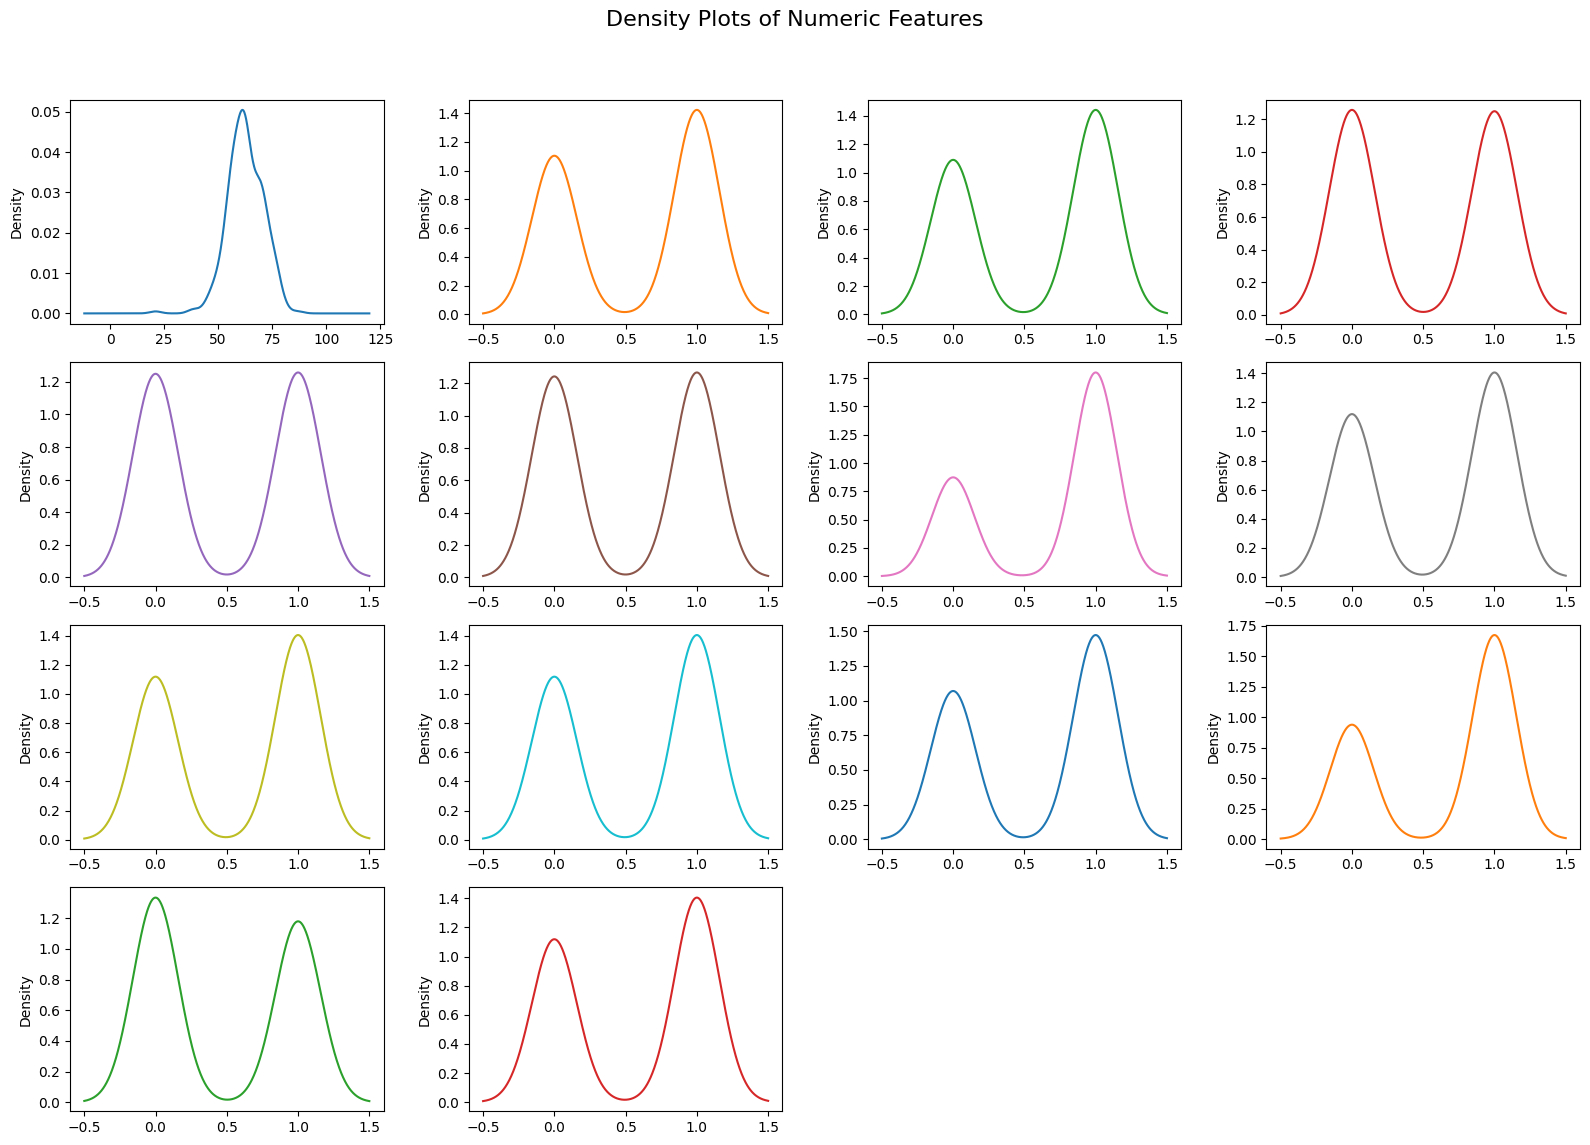

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Atur layout dan ukuran plot
cols = 4
rows = int(np.ceil(len(numeric_cols) / cols))
figsize = (cols * 4, rows * 3)

# Plot density untuk tiap kolom numeric
axes = data[numeric_cols].plot(kind="density", subplots=True, layout=(rows, cols), figsize=figsize, sharex=False, sharey=False)

# Judul utama
plt.suptitle("Density Plots of Numeric Features", fontsize=16)

# Hilangkan legend pada tiap subplot
for ax in axes.flatten():
    ax.legend().remove()

# Perbaiki tata letak agar tidak saling tindih
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Supaya tidak tabrakan dengan suptitle
plt.show()



/tmp/ipython-input-15-3697588719.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


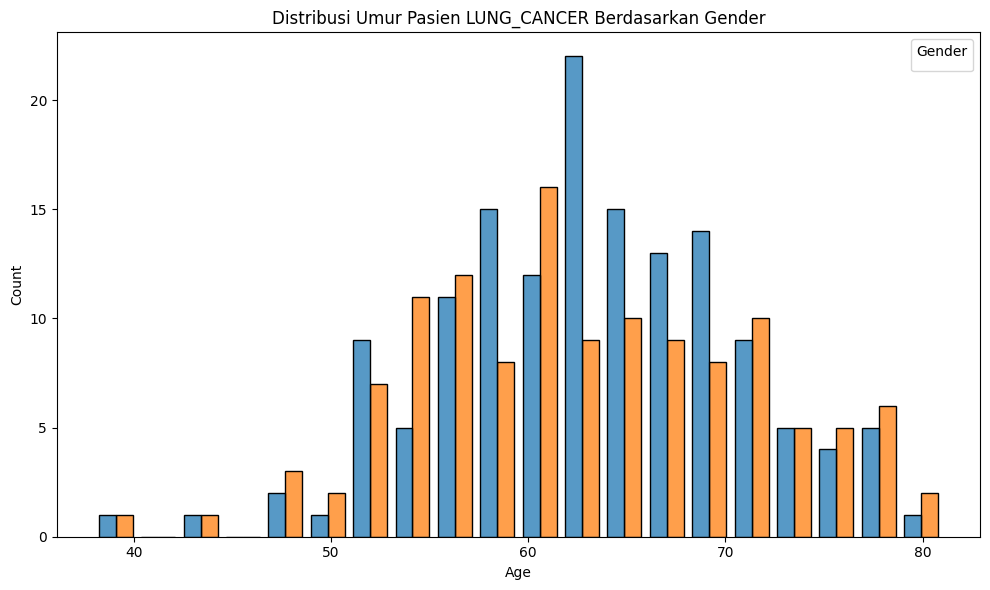

In [ ]:
subset = data[data['LUNG_CANCER'] == 'YES']

plt.figure(figsize=(10, 6))
sns.histplot(data=subset, x='AGE', hue='GENDER', multiple='dodge', bins=20, shrink=0.8)

plt.title('Distribusi Umur Pasien LUNG_CANCER Berdasarkan Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

#### Missing Value Heatmap


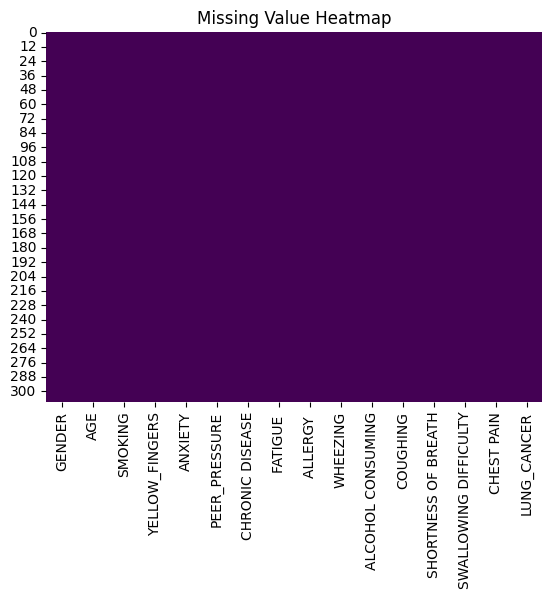

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

#### Deteksi Outlier Menggunakan Boxplot


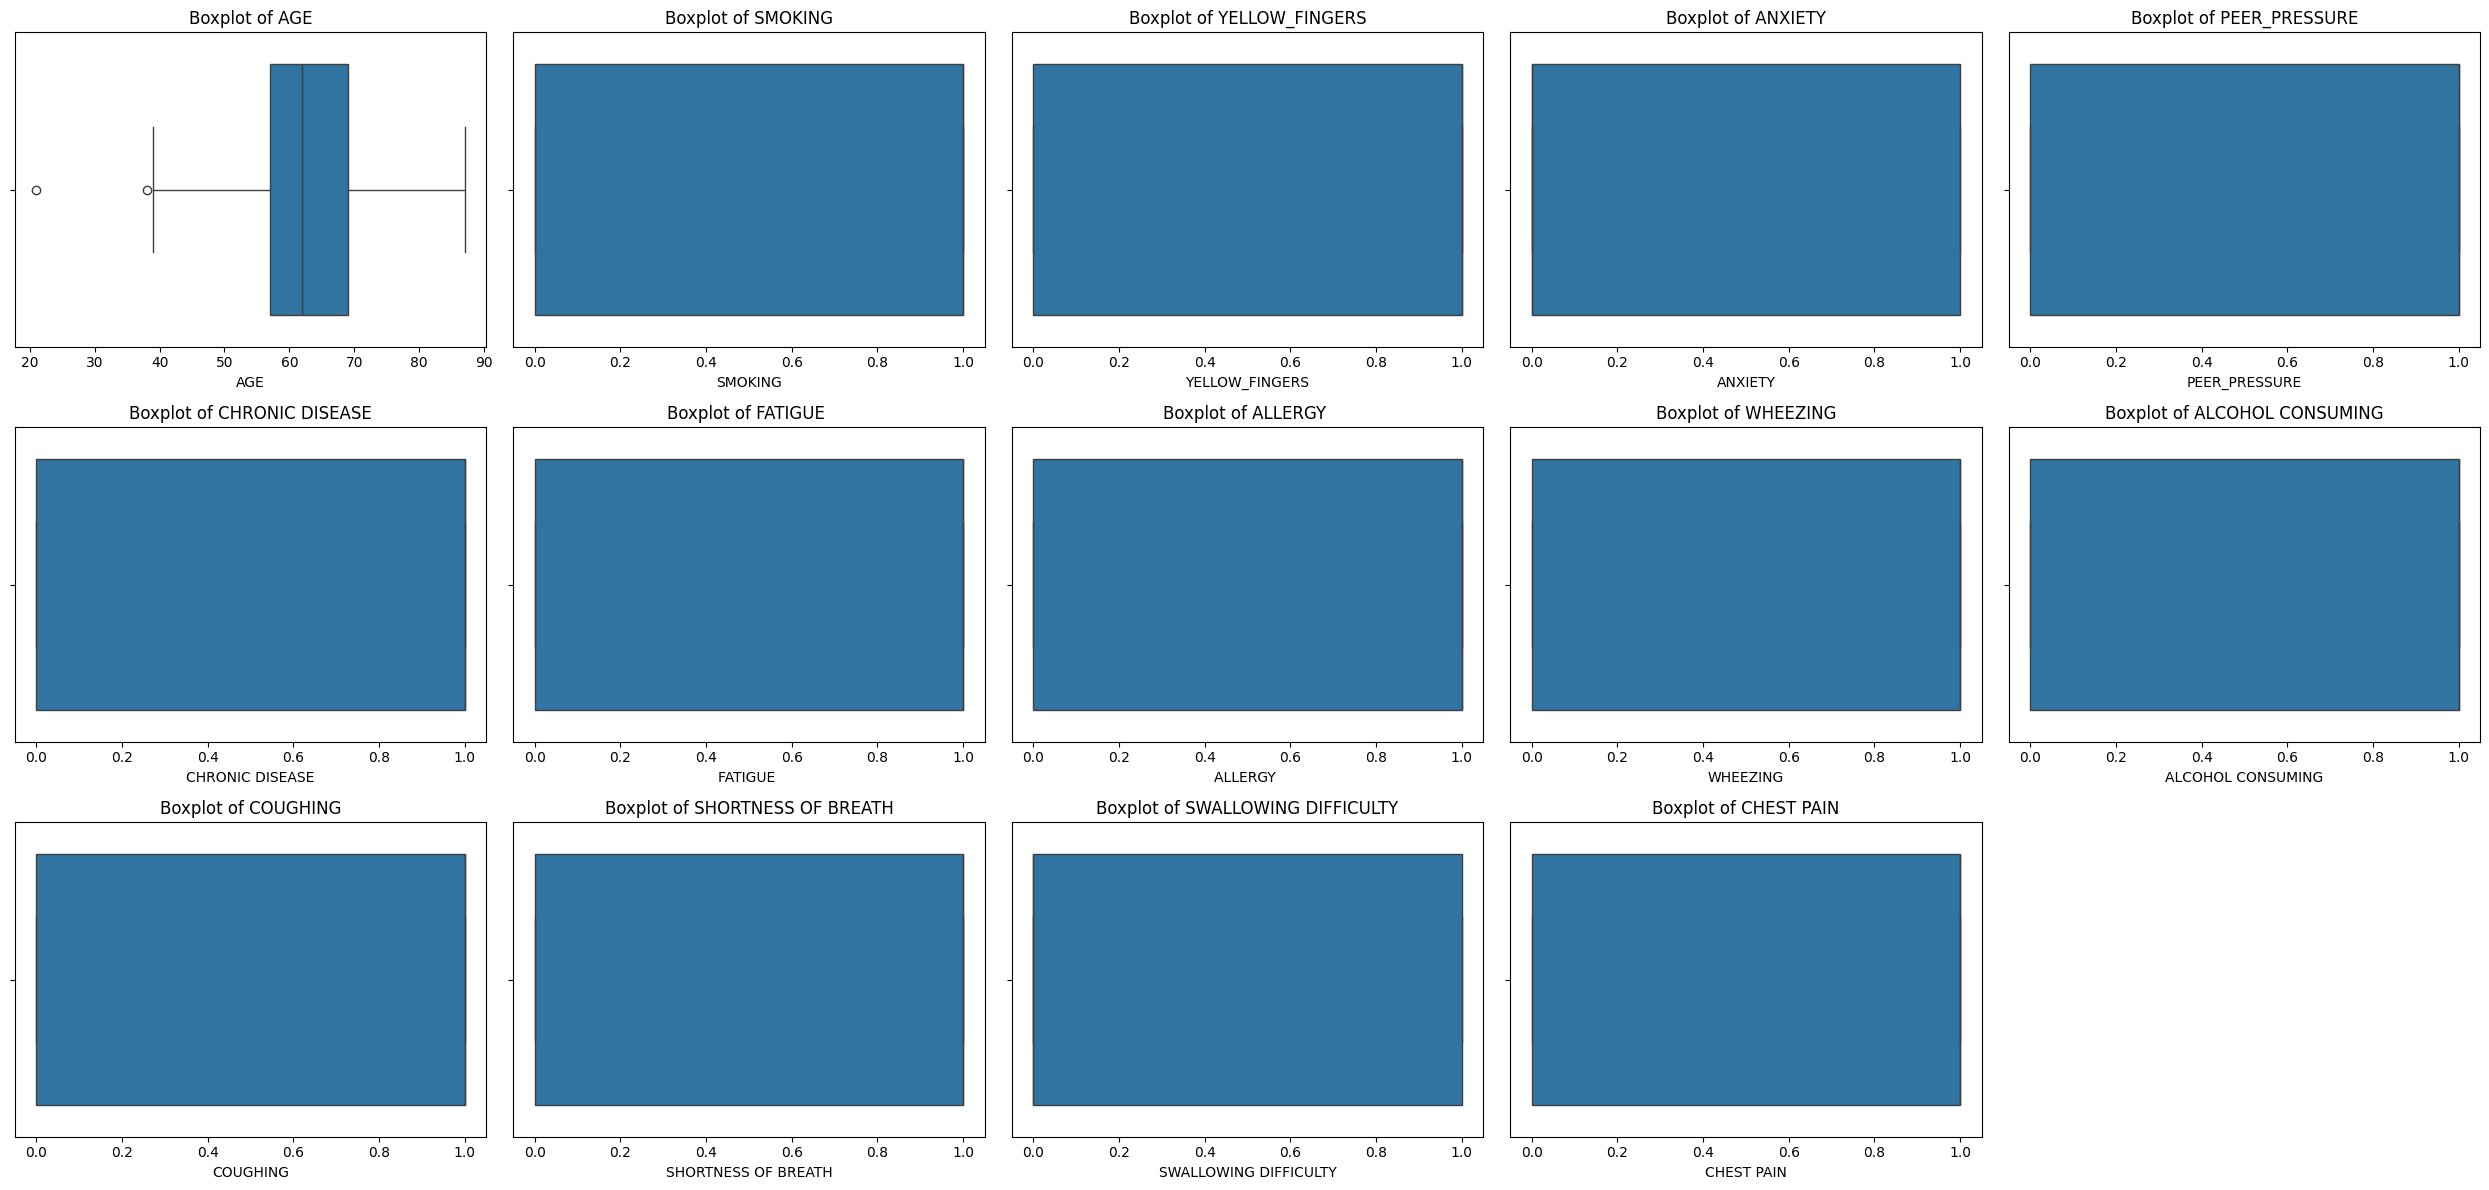

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

n_cols = 5
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


#### Visualisasi Data Kategorikal


In [ ]:
# Hitung batas bawah dan atas berdasarkan IQR
Q1 = data["AGE"].quantile(0.25)
Q3 = data["AGE"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Deteksi baris yang merupakan outlier
outliers_age = data[(data["AGE"] < lower_bound) | (data["AGE"] > upper_bound)]

# Hitung jumlah dan tampilkan
outliers_count = outliers_age.shape[0]
outliers_age_samples = outliers_age.sort_values("AGE")

outliers_count, outliers_age_samples[["AGE"]].head(10)

(2,
      AGE
 22    21
 238   38)

              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.734628    0.563107        0.569579    0.498382       0.501618   
std      7.964254    0.496806        0.495938    0.500808       0.500808   
min     39.000000    0.000000        0.000000    0.000000       0.000000   
25%     57.000000    0.000000        0.000000    0.000000       0.000000   
50%     62.000000    1.000000        1.000000    0.000000       1.000000   
75%     69.000000    1.000000        1.000000    1.000000       1.000000   
max     87.000000    1.000000        1.000000    1.000000       1.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          0.504854    0.673139    0.556634    0.556634           0.556634   
std           0.500787    0.469827    0.497588    0.497588           0.4

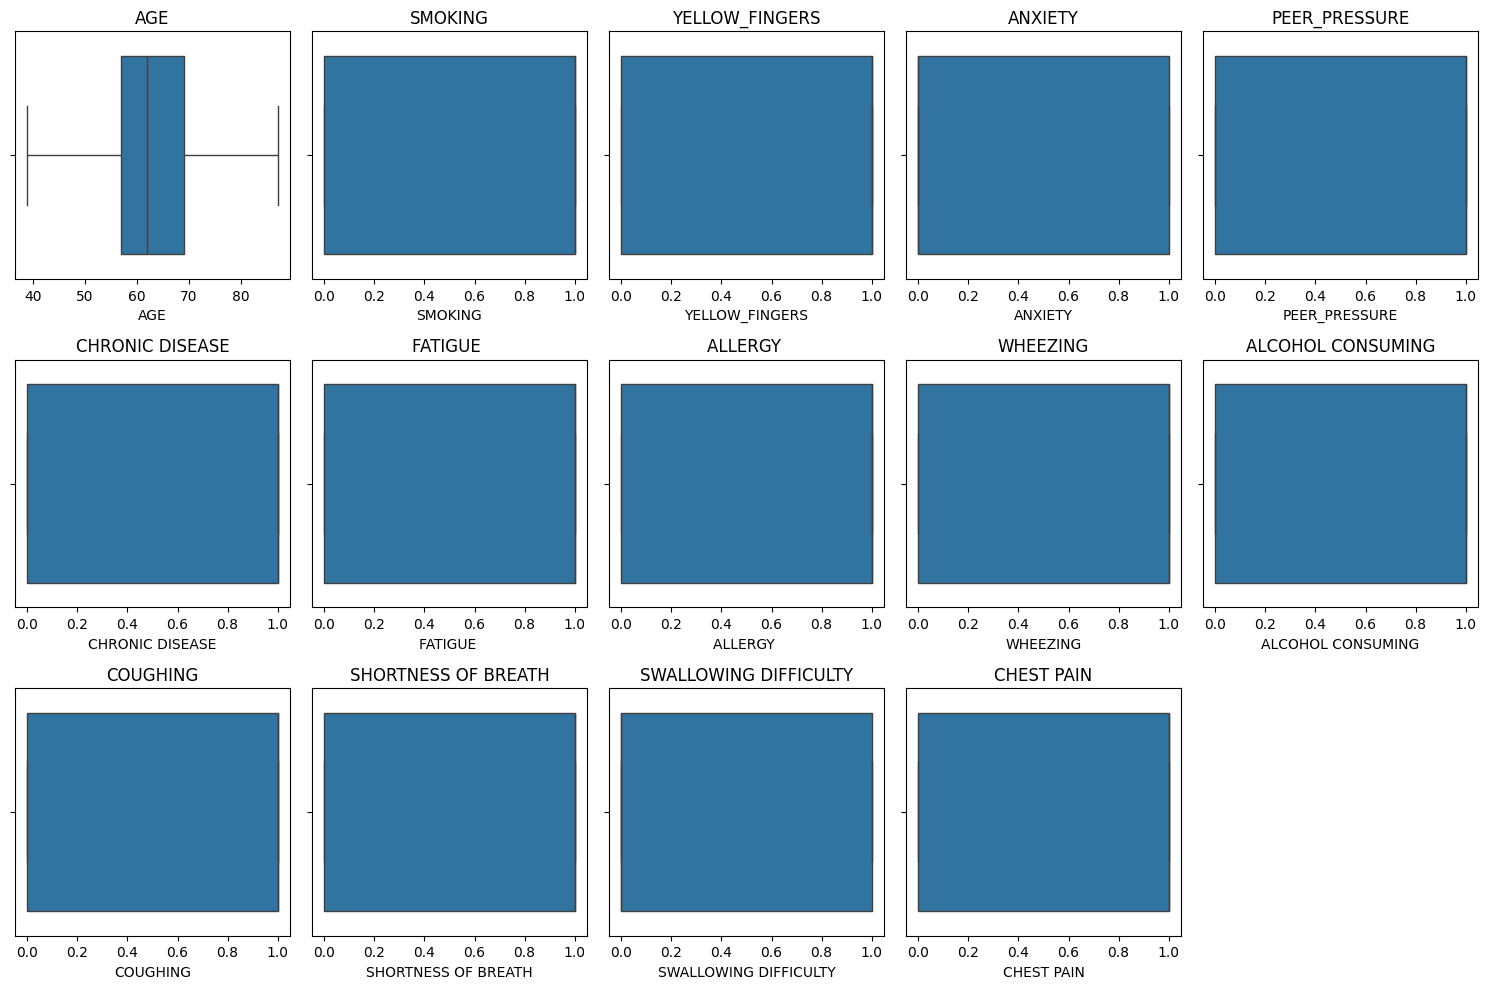

In [ ]:
# Fungsi sederhana untuk menangani outlier menggunakan IQR
def handle_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower, upper)  # Batasi nilai agar tetap dalam rentang IQR
    return df

# Salin data asli dan terapkan fungsi
data_cleaned = handle_outliers_iqr(data.copy(), numeric_cols)

# Tampilkan ringkasan statistik
print(data_cleaned.describe())

# Visualisasi hasil setelah penanganan outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(x=data_cleaned[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

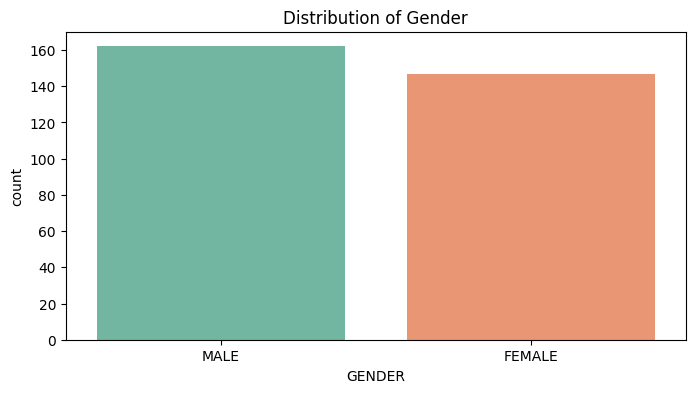

In [ ]:
# Bar plot untuk kolom 'Gender'
plt.figure(figsize=(8, 4))
sns.countplot(x="GENDER", hue="GENDER", data=data, palette="Set2")
plt.title("Distribution of Gender")
plt.show()

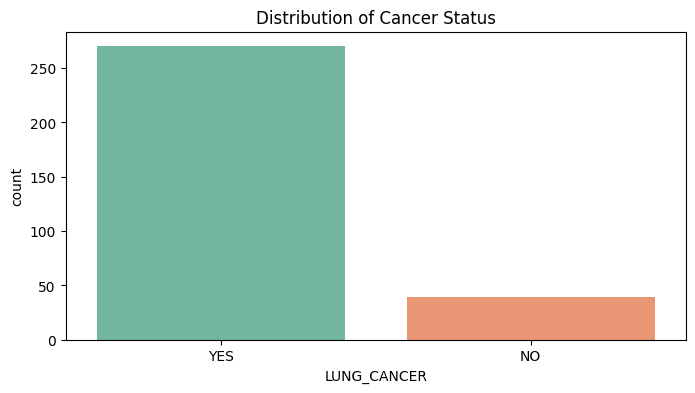

In [ ]:
# Bar plot untuk kolom 'Stunting'
plt.figure(figsize=(8, 4))
sns.countplot(x="LUNG_CANCER", hue="LUNG_CANCER", data=data, palette="Set2")
plt.title("Distribution of Cancer Status")
plt.show()

In [ ]:
data_clean = data.copy()

In [ ]:
# Cek jumlah baris duplikat
duplikat = data.duplicated()
print("Jumlah baris duplikat:", duplikat.sum())

# Menampilkan baris yang duplikat (jika ada)
data[duplikat]

Jumlah baris duplikat: 33


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,MALE,56,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
100,MALE,58,1,0,0,0,0,0,1,1,1,1,0,0,0,YES
117,FEMALE,51,1,1,1,1,0,1,1,0,0,0,1,1,0,YES
199,FEMALE,55,1,0,0,1,1,1,1,1,1,0,0,1,1,YES
212,MALE,58,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
223,MALE,63,1,1,1,0,1,1,1,1,0,0,1,0,0,YES
256,MALE,60,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
275,MALE,64,1,1,1,1,1,0,0,0,1,0,0,1,1,YES
284,MALE,58,1,1,1,1,1,0,0,0,1,0,0,1,1,YES
285,FEMALE,58,1,1,1,1,0,1,0,0,0,1,1,1,0,YES


#### Feature Scaling menggunakan MinMaxScaler


In [ ]:
# Inisialisasi MinMaxScaler dengan rentang 0-1
scaler = MinMaxScaler(feature_range=(0.1, 0.9))

# Terapkan scaler pada kolom numerik
numeric_cols = ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
data_clean[numeric_cols] = scaler.fit_transform(data_clean[numeric_cols])

# Tampilkan beberapa baris hasil scaling
print(data_clean[numeric_cols].head())


        AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
0  0.681818      0.1             0.9      0.9            0.1              0.1   
1  0.742424      0.9             0.1      0.1            0.1              0.9   
2  0.560606      0.1             0.1      0.1            0.9              0.1   
3  0.609091      0.9             0.9      0.9            0.1              0.1   
4  0.609091      0.1             0.9      0.1            0.1              0.1   

   FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0       0.9       0.1       0.9                0.9       0.9   
1       0.9       0.9       0.1                0.1       0.1   
2       0.9       0.1       0.9                0.1       0.9   
3       0.1       0.1       0.1                0.9       0.1   
4       0.1       0.1       0.9                0.1       0.9   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0                  0.9                    0.9         0.9  
1       

#### Encoding Variabel Kategorikal


In [ ]:
# Inisialisasi label encoder
le = LabelEncoder()

# Encode kolom 'Gender'
data_clean["GENDER"] = le.fit_transform(data_clean["GENDER"])
data["GENDER"] = le.fit_transform(data["GENDER"])


# Encode kolom 'Cancer'
data_clean["LUNG_CANCER"] = le.fit_transform(data_clean["LUNG_CANCER"])
data["LUNG_CANCER"] = le.fit_transform(data["LUNG_CANCER"])

# Tampilkan nilai unik setelah encoding
print("Unique values in GENDER:", data_clean["GENDER"].unique())
print("Unique values in LUNG_CANCER:", data_clean["LUNG_CANCER"].unique())

Unique values in GENDER: [1 0]
Unique values in LUNG_CANCER: [1 0]


#### Data Balancing


In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# Pisahkan fitur dan label
X = data_clean.drop(columns=["LUNG_CANCER"])
y = data_clean["LUNG_CANCER"]

# Terapkan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)
nm = NearMiss()
rus = RandomUnderSampler(random_state=42, sampling_strategy="auto")
X_balanced, y_balanced = smote.fit_resample(X, y)

# buat dataframe dari hasil SMOTE untuk analisis correlation
data_balanced = pd.DataFrame(X_balanced, columns=X.columns)
data_balanced["LUNG_CANCER"] = y_balanced
# Tampilkan distribusi kelas setelah balancing
print("Distribusi kelas setelah balancing:")
print(pd.Series(y_balanced).value_counts())


Distribusi kelas setelah balancing:
LUNG_CANCER
1    270
0    270
Name: count, dtype: int64


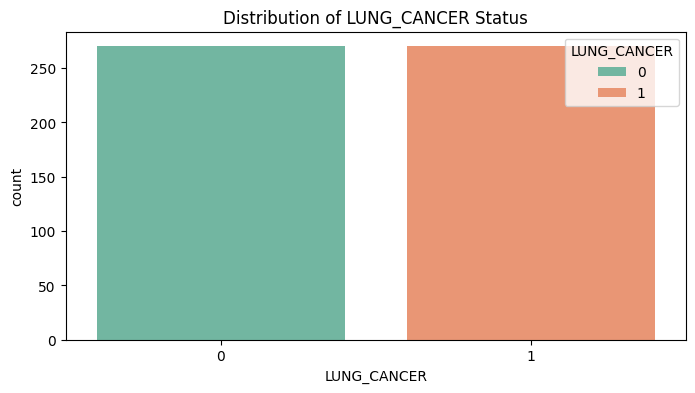

In [ ]:
# Bar plot untuk kolom 'Stunting'
plt.figure(figsize=(8, 4))
sns.countplot(x="LUNG_CANCER", hue="LUNG_CANCER", data=data_balanced, palette="Set2")
plt.title("Distribution of LUNG_CANCER Status")
plt.show()

In [ ]:
# Inisialisasi MinMaxScaler dengan rentang 0-1
scaler = MinMaxScaler(feature_range=(0.1, 0.9))

# Terapkan scaler pada kolom numerik
data_balanced[numeric_cols] = scaler.fit_transform(data_balanced[numeric_cols])

# Tampilkan beberapa baris hasil scaling
print(data_balanced[numeric_cols].head())


        AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
0  0.681818      0.1             0.9      0.9            0.1              0.1   
1  0.742424      0.9             0.1      0.1            0.1              0.9   
2  0.560606      0.1             0.1      0.1            0.9              0.1   
3  0.609091      0.9             0.9      0.9            0.1              0.1   
4  0.609091      0.1             0.9      0.1            0.1              0.1   

   FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0       0.9       0.1       0.9                0.9       0.9   
1       0.9       0.9       0.1                0.1       0.1   
2       0.9       0.1       0.9                0.1       0.9   
3       0.1       0.1       0.1                0.9       0.1   
4       0.1       0.1       0.9                0.1       0.9   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0                  0.9                    0.9         0.9  
1       

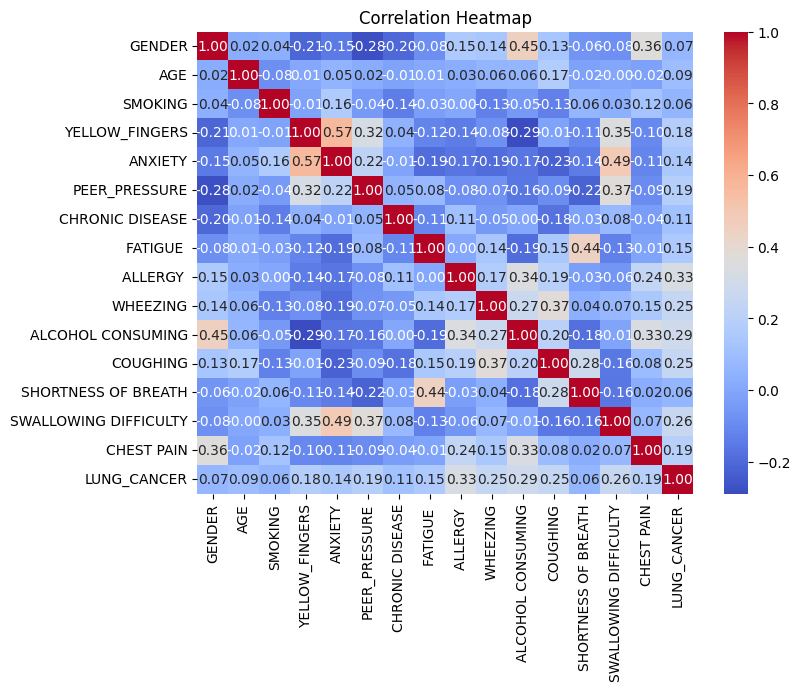

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

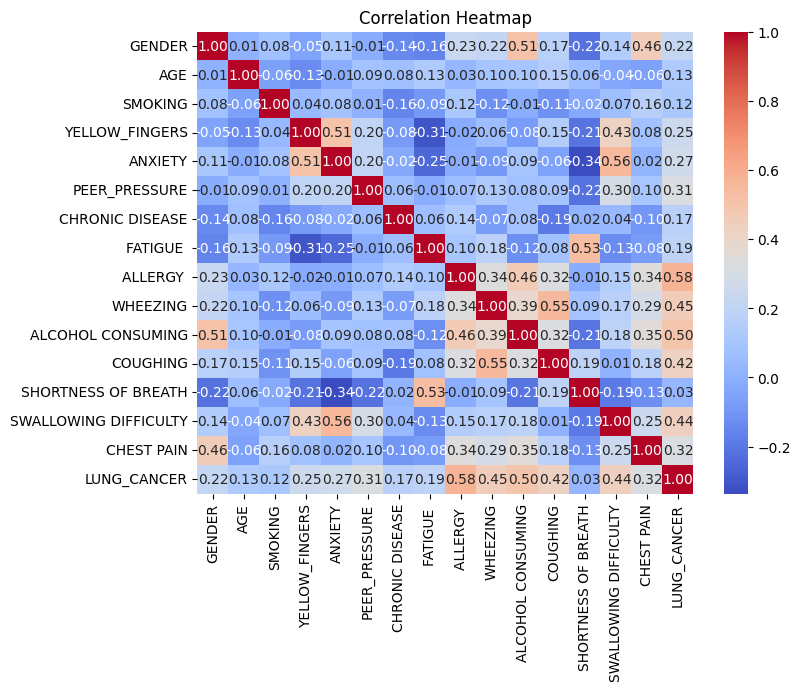

In [ ]:
corr_matrix = data_balanced.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 3. Feature Engineering


## 4. Modeling


#### Split Data


In [ ]:
X = data.drop(columns=["LUNG_CANCER"])
y = data["LUNG_CANCER"]
# Bagi data ke dalam training dan testing set, 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Tampilkan ukuran masing-masing set
print("Ukuran Training set:", X_train.shape)
print("Ukuran Testing set:", X_test.shape)

Ukuran Training set: (216, 15)
Ukuran Testing set: (93, 15)


#### Model Creating


## 5. Model Training


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Akurasi Random Forest: 0.967741935483871
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.98      0.99      0.98        86

    accuracy                           0.97        93
   macro avg       0.91      0.85      0.88        93
weighted avg       0.97      0.97      0.97        93



####visualisasi model

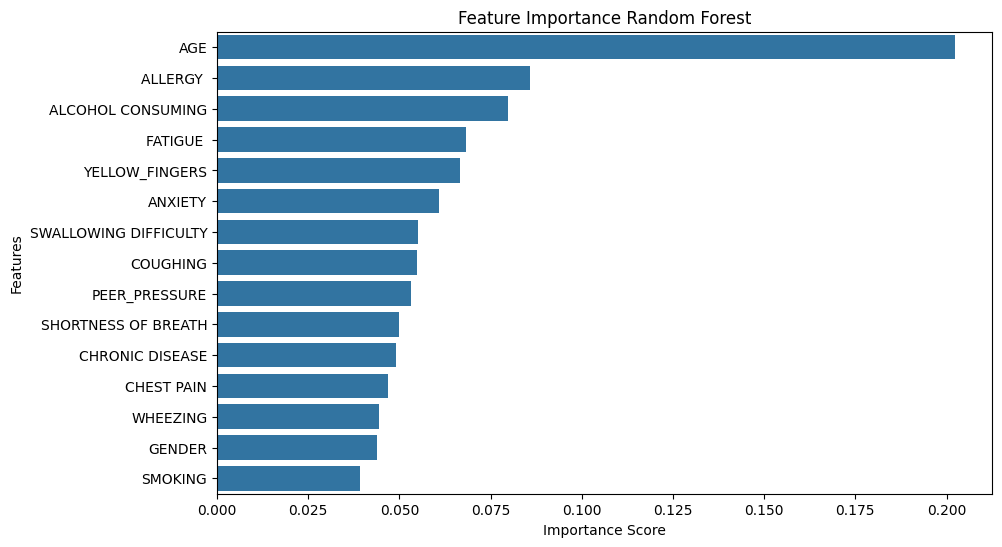

In [ ]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


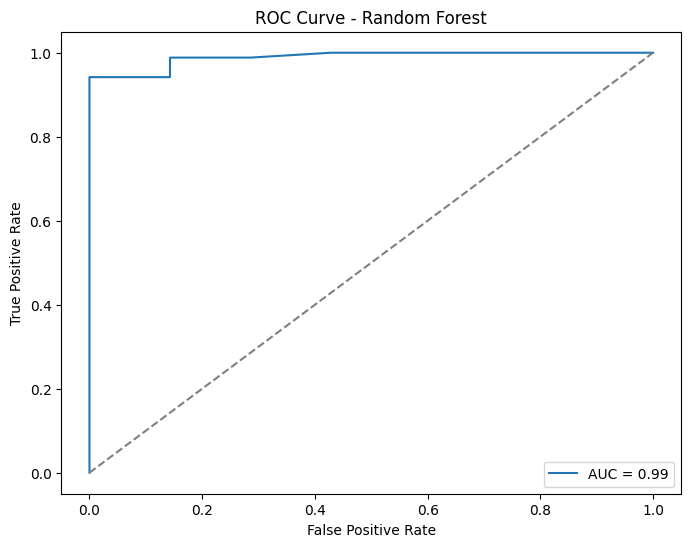

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


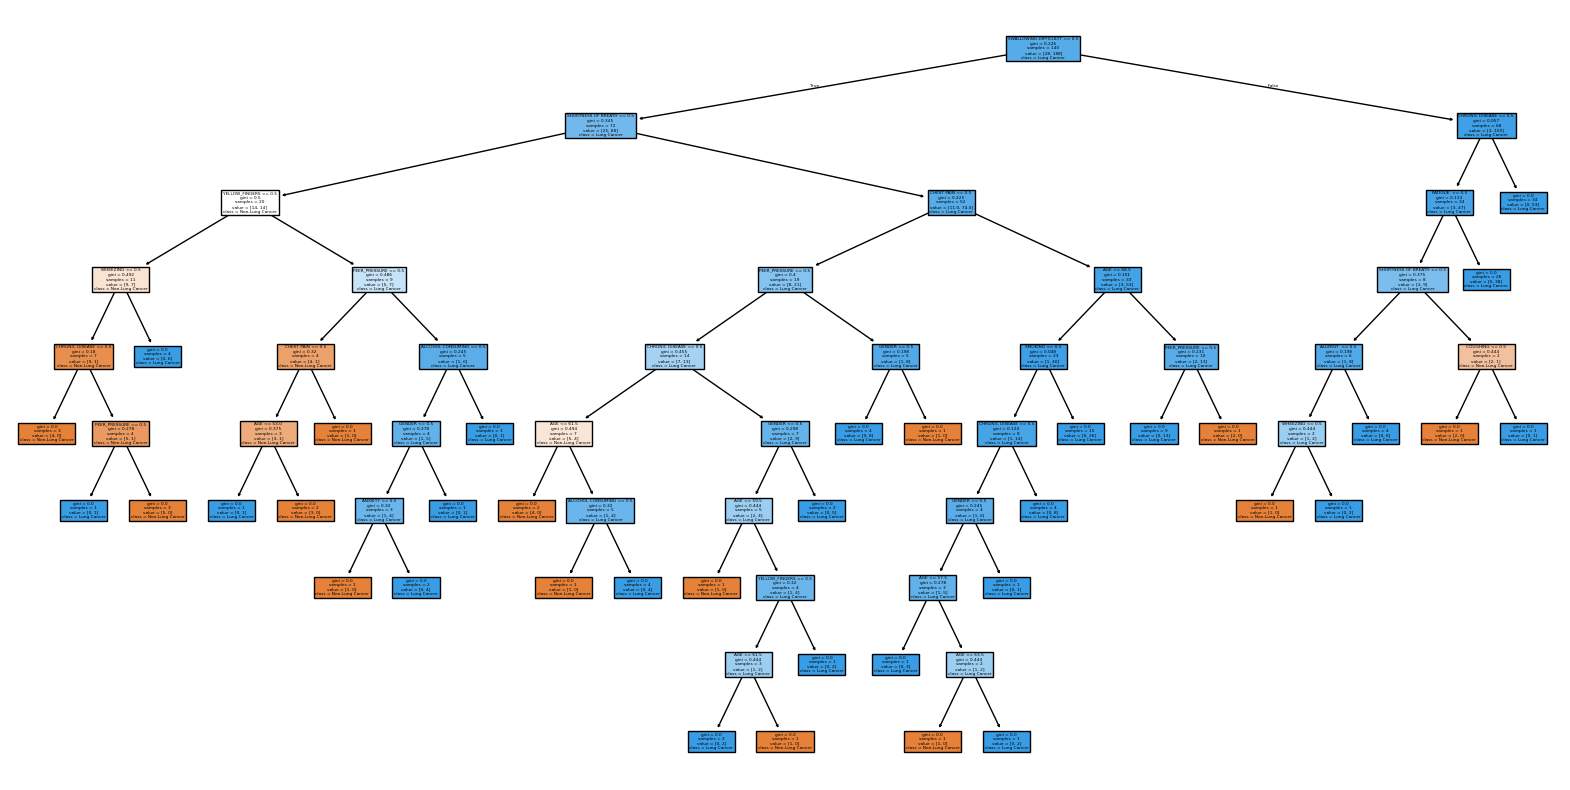

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0],
          feature_names=X_train.columns,
          class_names=["Non-Lung Cancer", "Lung Cancer"],
          filled=True)
plt.show()


## 6. Model Evaluation


In [ ]:
# Melakukan prediksi pada data testing
y_pred = rf_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Hasil Evaluasi Model KNN:")
print("Akurasi  :", accuracy)
print("Presisi  :", precision)
print("Recall   :", recall)
print("F1-Score :", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Hasil Evaluasi Model KNN:
Akurasi  : 0.967741935483871
Presisi  : 0.9770114942528736
Recall   : 0.9883720930232558
F1-Score : 0.9826589595375722

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.98      0.99      0.98        86

    accuracy                           0.97        93
   macro avg       0.91      0.85      0.88        93
weighted avg       0.97      0.97      0.97        93



Confusion Matrix (DataFrame):
                         Predicted: Non-Lung Cancer  Predicted: Lung Cancer
Actual: Non-Lung Cancer                           5                       2
Actual: Lung Cancer                               1                      85


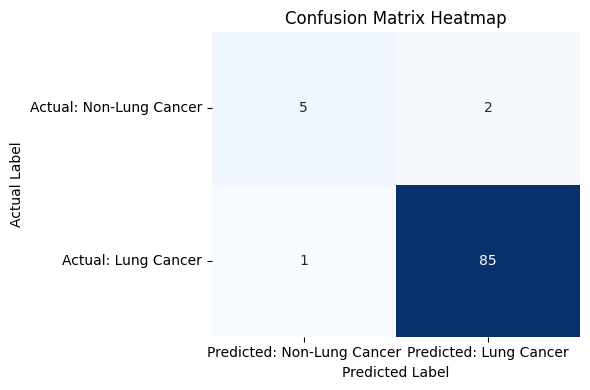

In [ ]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat DataFrame confusion matrix untuk ditampilkan
cm_df = pd.DataFrame(
    cm,
    index=["Actual: Non-Lung Cancer", "Actual: Lung Cancer"],
    columns=["Predicted: Non-Lung Cancer", "Predicted: Lung Cancer"],
)

# Tampilkan confusion matrix sebagai DataFrame
print("Confusion Matrix (DataFrame):")
print(cm_df)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()
